<a href="https://colab.research.google.com/github/HibaAyadi/Expense-Tracker/blob/main/Ayadi_Hiba_G1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # S&P 5OO Financial data time serie modeling


# 1- Abstract:

This project presents the steps involved in modeling the S&P 500 data, beginning with an exploration of its trends, seasonality, and distribution. The analysis reveals a dominant trend with minimal seasonality, guiding the choice of an appropriate modeling approach. After applying differencing to uncover hidden patterns beneath the strong trend, several model candidates were evaluated. Ultimately, ARIMA(0,2,1) was selected as it captured most of the variance, leaving white noise residuals. However, this simple model showed limitations in forecasting  and failed to account for data fluctuations. Subsequent trials with more complex models yielded poorer results, leading to the conclusion that ARIMA modeling may not be the best for this financial data. Given the volatility of financial markets, alternative models like GARCH may be more appropriate for capturing the inherent volatility and nature of the data.

# 2- Introduction:


The S&P 500 is a vital benchmark for the U.S. stock market, representing the collective performance of 500 major publicly traded companies. In this study, we focus on the monthly closing prices of the SPY ETF, an exchange-traded fund . This dataset, consisting of real world, univariate, and continuous data, is ideal for time series analysis due to its robust size 12 observations per year(monthly sampling frequency), amounting to over 60 data points, which allows for meaningful statistical modeling.

Understanding long-term market trends is important for many people, including investors, policymakers, and financial analysts. While daily market changes get the most attention, looking at monthly data gives a better view of overall economic trends. This helps in making smarter investment choices, managing risks, and predicting future market movements. By analyzing trends, seasonality, and hidden patterns, we can better understand how the market behaves.

This project focuses on  building time series models in order to  is to improve our ability to predict future market trends and support better financial decisions.

# 3- Model specification.

>>1-installing the necessary packges

In [ ]:
install.packages("quantmod")
install.packages("TSA")
install.packages("car")

Installing package into 'C:/Users/ayadi/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'quantmod' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ayadi\AppData\Local\Temp\RtmpGWoyBo\downloaded_packages


Installing package into 'C:/Users/ayadi/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'TSA' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ayadi\AppData\Local\Temp\RtmpGWoyBo\downloaded_packages


Installing package into 'C:/Users/ayadi/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'car' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ayadi\AppData\Local\Temp\RtmpGWoyBo\downloaded_packages


>>2-Loading Data from Yahoo Finance

**Note**: This script downloads historical monthly closing prices of the SPY ETF (which tracks the S&P 500) from Yahoo Finance for independent time series analysis. Please ensure that the internet is available so the data can be loaded if you need to rerun the code.

In [ ]:

library(quantmod)


getSymbols("SPY", from = "2011-01-01", to = "2015-12-31", src = "yahoo", periodicity = "monthly")



head(SPY)


Warning message:
"package 'quantmod' was built under R version 4.4.3"
Loading required package: xts

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



[1] "SPY"

           SPY.Open SPY.High SPY.Low SPY.Close SPY.Volume SPY.Adjusted
2011-01-01   126.71   130.35  125.70    128.68 2860314700     99.29708
2011-02-01   129.46   134.69  129.38    133.15 2820073500    102.74645
2011-03-01   133.57   133.69  125.28    132.59 4787459400    102.31429
2011-04-01   133.41   136.57  129.51    136.43 2812718500    105.73483
2011-05-01   137.07   137.18  131.38    134.90 3337607300    104.54904
2011-06-01   134.51   134.92  126.19    131.97 4710433400    102.27829

We have chosen closing prices to keep the dataset univariate and avoid unnecessary noise. Closing prices are the most analyzed metric in finance, reflecting market at the end of each period and providing a stable basis for time series modeling.





- Next we will plot our data in order to analyse its behavior

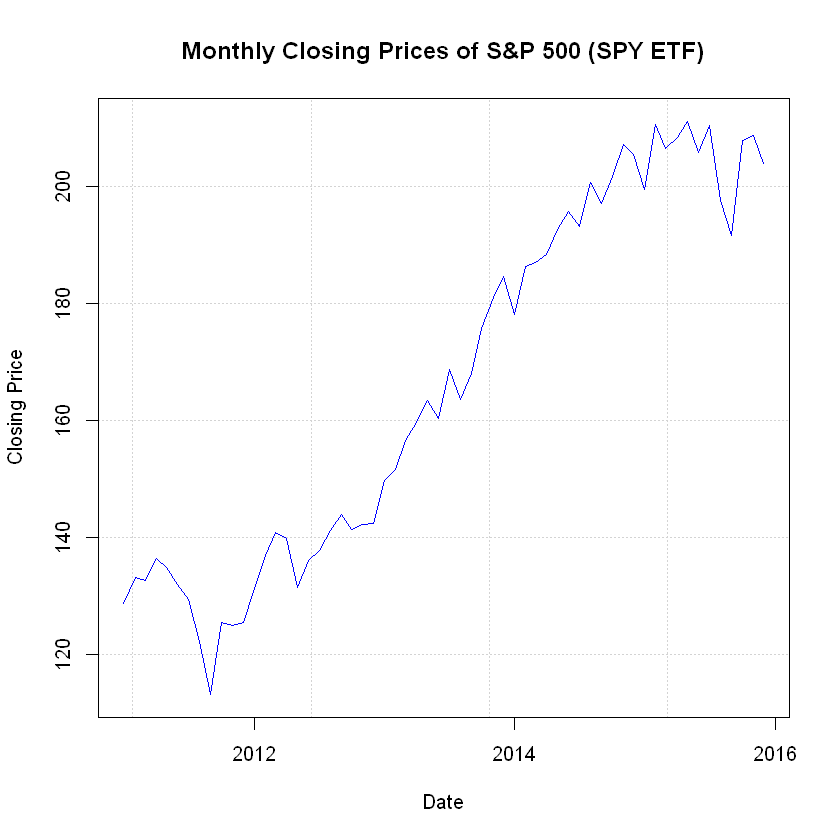

In [ ]:

closing_price <- Cl(SPY)


par(bg = "white")

plot(index(closing_price), closing_price, type = "l", col = "blue",
     xlab = "Date", ylab = "Closing Price",
     main = "Monthly Closing Prices of S&P 500 (SPY ETF)",
     col.main = "black",
     col.lab = "black",
     col.axis = "black",
     panel.first = grid())


In [ ]:

sum(is.na(closing_price))


[1] 0

Initial data interpretation :
This time series displays a general upward trend over time,
reflecting the growth in the S&P 500 index. However,
it also exhibits fluctuations that could be attributed
to market volatility. While no clear seasonality is immediately
apparent, periodic peaks  suggest the presence of cyclical
patterns influenced by economic or market conditions. Further analysis
is required to confirm any recurring patterns or trends.

>>***Assumptions***

>>1-trend existence :we remark that our  data increases over time, from which  we assume that , the mean is changing, and it is not stationary in the mean which implies that the time serie is not stationary . The growth appears to be accelerating over time, suggesting possible exponential growth rather than a simple linear trend.

>>2-Periods of volatility: Around 2011, there is a sharp drop followed by a rapid recovery, likely due to major economic events .

>>3-Seasonality unclear: No obvious repeating seasonal pattern at first glance, but further decomposition is needed to confirm.

>>4-stationarity : The presence of a strong upward trend and possible seasonality suggests significant non-stationarity and need to be confirm more using statistical methods .

>>5 - Outliers: We observed a sudden drop in the closing price in late 2011. Upon investigation, we found that the S&P 500 drop (2011–2012) likely corresponds to the U.S. debt ceiling crisis of 2011. During this period, Standard & Poor’s downgraded the U.S. credit rating, leading to significant market volatility.

>> In this step we will decompose our chart for futher data analysis

Warning message:
"package 'TSA' was built under R version 4.4.3"

Attaching package: 'TSA'


The following objects are masked from 'package:stats':

    acf, arima


The following object is masked from 'package:utils':

    tar




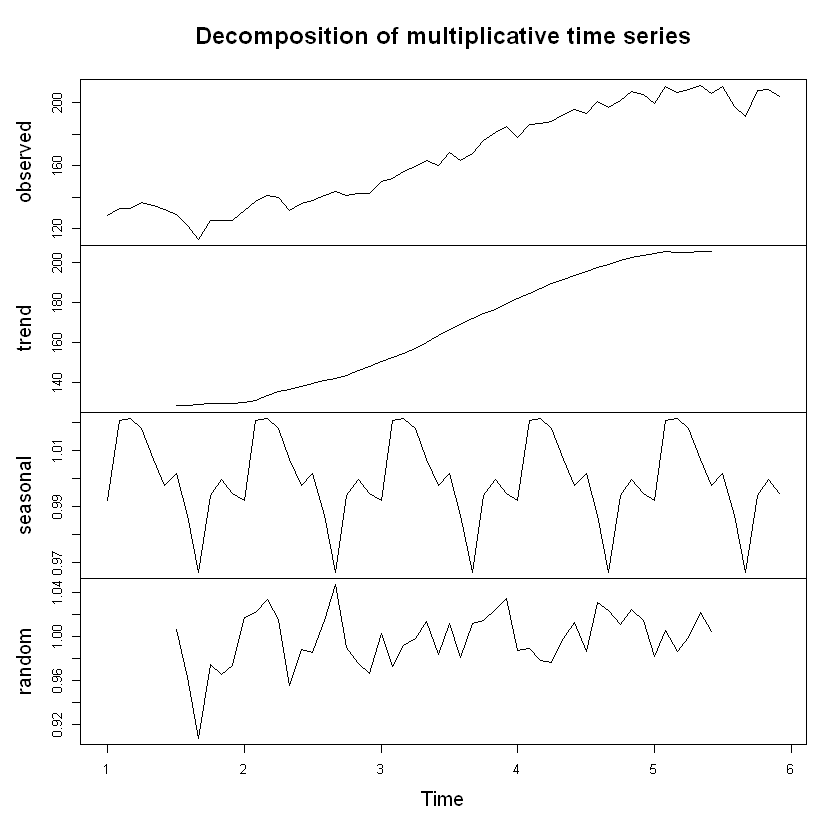

In [ ]:

library(TSA)

sp500_ts <- ts(closing_price, frequency = 12)

decomposed <- decompose(sp500_ts, type = "multiplicative")

par(bg = "white")
plot(decomposed)


>>Chart interpretation: The decomposition chart shows that the trend dominates, capturing most of the data variance, while seasonality is present but at a very small interval (0.97 to 1.01), indicating weak seasonality. As for the randomness, the data is not truly a white noise , suggesting that there are still interesting patterns present. Therefore, we suggest that simple linear or polynomial approaches may not fully capture the complexities of our data.

>>These results are justifiable, as sales and economic data typically exhibit increasing trends along with some volatility, influenced by external factors such as market dynamics, economic cycles, and unexpected events like financial crises or global disruptions.

- Since seasonality plays a significant role in the modeling phase , we should consider statistical tests for seasonality to confirm whether we should account for the seasonality presence  and determine if it is truly negligible and will not affect our next steps.

- To do that, we will perform the Kruskal-Wallis rank sum test, which helps determine whether there are significant differences in the median values across different time periods . If the test detects significant differences, it suggests the presence of seasonality in the data.

In [ ]:
library(quantmod)

closing_price_numeric <- as.numeric(closing_price)

months <- factor(format(index(closing_price), "%m"))

kruskal.test(closing_price_numeric ~ months)



	Kruskal-Wallis rank sum test

data:  closing_price_numeric by months
Kruskal-Wallis chi-squared = 1.2213, df = 11, p-value = 0.9999


>>Seasonality Test Interpretation:

The Krustal wallis rank sum test with  p-value = 0.9999, which is much greater than 0.05, fails to reject the null hypothesis, meaning there is no significant seasonal effect in the data.which confirm our remarks from the decomposition chart on how the range of seasonality is not significant .

-Additionally, later on we will use the ACF plot to further confirm seasonal patterns before proceeding with model selection.


>> 3-Check for non-constant variance: We test for heteroscedasticity

Addressing non-constant variance is an essential step and must be done before proceeding with processing steps such as using differencing to achieve stationarity.

To test for heteroscedasticity, we use Levene’s test as well as the Box-Cox transformation to confirm the results.

In [ ]:
library(car)


closing_price_df <- data.frame(
  closing_price = as.numeric(closing_price),
  time_index = as.numeric(index(closing_price))
)

closing_price_df$group <- ifelse(closing_price_df$time_index < median(closing_price_df$time_index),
                                 "First Half", "Second Half")

leveneTest(closing_price ~ group, data = closing_price_df)


Warning message in leveneTest.default(y = y, group = group, ...):
"group coerced to factor."


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,1.029183,0.3145641
,58,NA,NA


- Since the p-value (0.3146) is greater than 0.05, this test fails to reject the null hypothesis, meaning there is no significant difference in variance. This supports the assumption of homoscedasticity in our data.

-In this step we will confirm the levene's test results by using the BOX-COX transformation

[1] 0.7878788


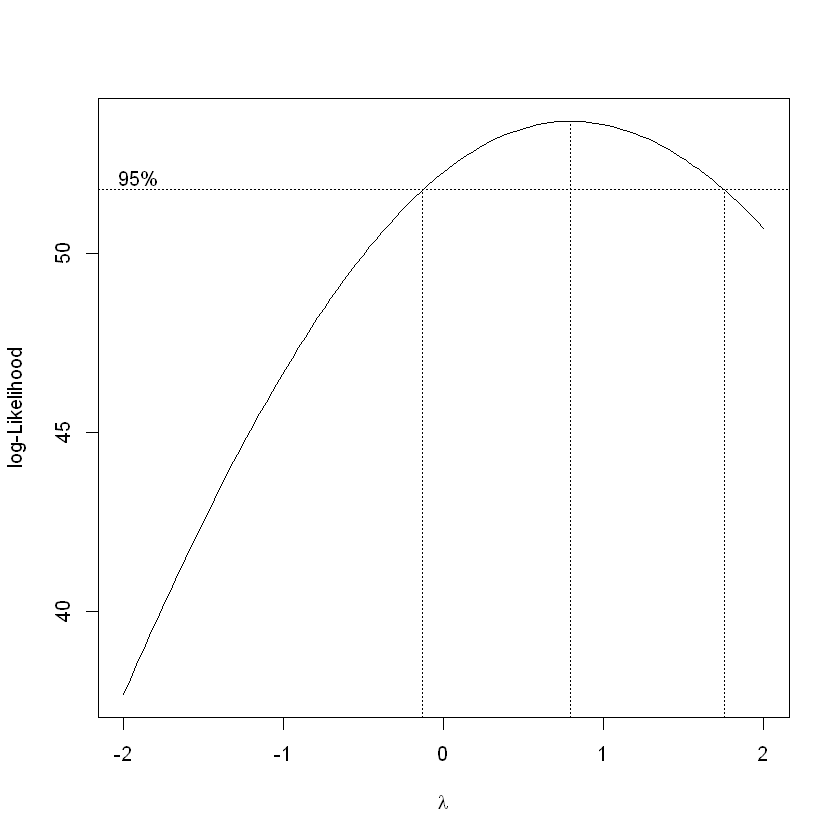

In [ ]:

library(MASS)
par(bg = "white")

closing_price <- as.numeric(closing_price)
your_data <- data.frame(closing_price = closing_price, time_index = index(closing_price))

lm_model <- lm(closing_price ~ time_index, data = your_data)

boxcox_model <- boxcox(lm_model, lambda = seq(-2, 2, 0.1))
par(bg = "white")

optimal_lambda <- boxcox_model$x[which.max(boxcox_model$y)]
print(optimal_lambda)


The optimal λ = 0.7878788 (λ ≈ 1) from the Box-Cox transformation suggests that no transformation is needed, confirming Levene's test results. This justifies that while there is some variance instability (due to crises like the U.S. debt ceiling ), the data does not require an extreme transformation. The variance appears to stabilize naturally after these crises .


 After analyzing the raw data chart for trends and seasonality, we proceed with statistical methods by plotting the ACF and PACF to check for stationarity.

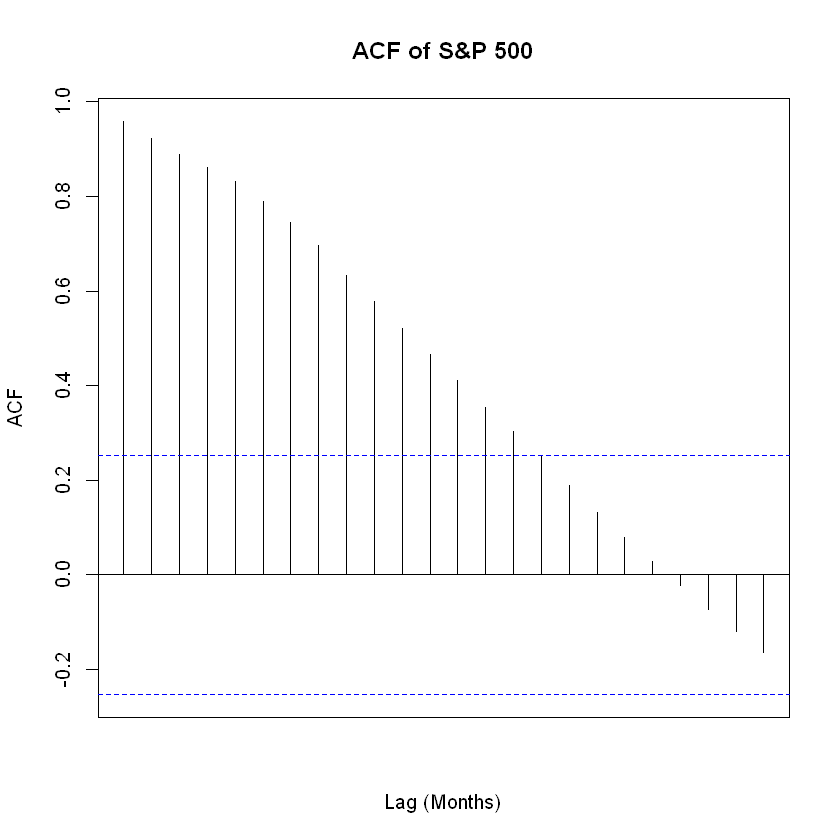

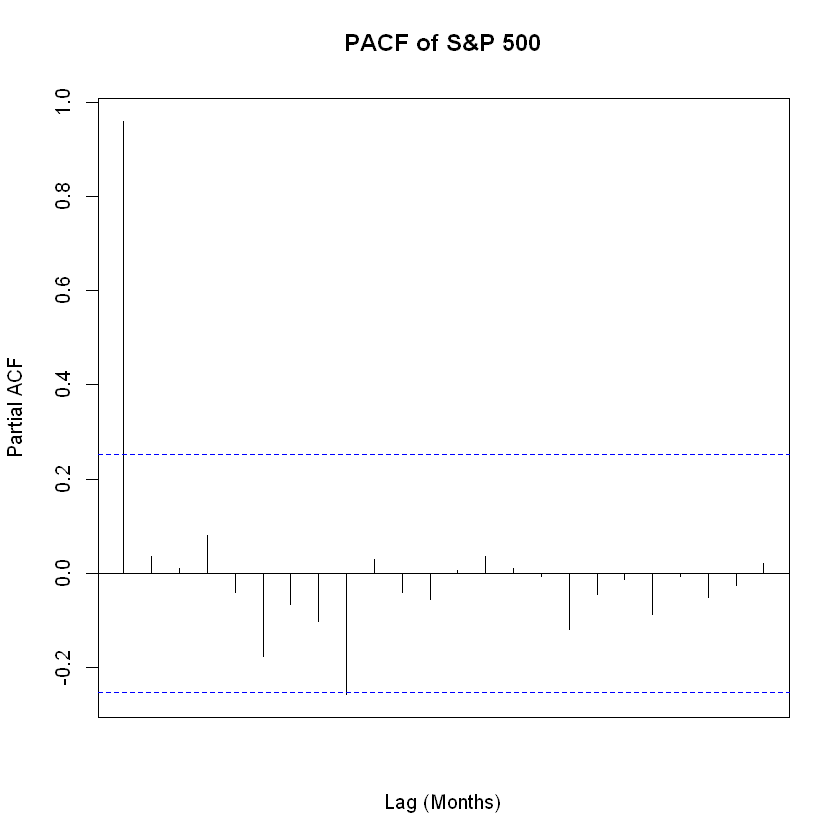

In [ ]:
library(TSA)
sp500_ts <- ts(closing_price, frequency = 12)

par(bg = "white")

acf(sp500_ts, lag.max = 24, main="ACF of S&P 500", xlab="Lag (Months)", xaxt = "n")

axis(1, at=seq(0, 24, by=6), labels=seq(0, 24, by=6))

pacf(sp500_ts, lag.max = 24, main="PACF of S&P 500", xlab="Lag (Months)", xaxt = "n")

axis(1, at=seq(0, 24, by=6), labels=seq(0, 24, by=6))


>>Chart Interpretation:
The ACF does not show strong evidence of seasonality over a 24-month period, as there are no repeating spikes at 12-month intervals. Instead, it exhibits a slow decay, which is a strong indicator of non-stationarity. Additionally, a large number of spikes fall outside the confidence interval, suggesting significant correlation in the data and indicates that differencing may be needed. The PACF shows a strong initial spike followed by a sharp cutoff, which suggests a strong trend component and possible autoregressive (AR) behavior.


>> These patterns align with the nature of financial market data, where long-term trends and persistent correlations are common due to multipl factors investor behavior. The absence of a clear seasonal pattern is expected, as monthly stock market data is more influenced by broader economic trends rather than strict seasonal cycles.

>>To Strengthen our assumption about nonstationarity we will perform the Augmented Dickey-Fuller (ADF) test with null hypothesis:" (non stationarity)"
if p_value >0,05 we accept

In [ ]:
library(tseries)


adf_test <- adf.test(closing_price)

print(adf_test)

Warning message:
"package 'tseries' was built under R version 4.4.3"



	Augmented Dickey-Fuller Test

data:  closing_price
Dickey-Fuller = -2.6812, Lag order = 3, p-value = 0.2994
alternative hypothesis: stationary



>>Clearly the p-value = 0.2994 >0.05 means we accept the hypothesis thus our time serie is not stationary .

>>  Our next step is to investigate the trend further to determine whether it is deterministic or stochastic. To do this, we will perform deterministic trend modeling .

>>***a-Deterministic trend modeling***




Based on domain knowledge, financial data often shows strong regression trends. To explore this, we will fit the first three orders of regression and analyze the trend.

>>1. Linear Model

In [ ]:

model_linear <- lm(closing_price ~ time(closing_price))
summary(model_linear)


Call:
lm(formula = closing_price ~ time(closing_price))

Residuals:
     Min       1Q   Median       3Q      Max 
-20.1894  -6.7118   0.1408   6.8889  15.5620 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -7.276e+02  3.419e+01  -21.28   <2e-16 ***
time(closing_price)  5.633e-02  2.153e-03   26.16   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.79 on 58 degrees of freedom
Multiple R-squared:  0.9219,	Adjusted R-squared:  0.9205 
F-statistic: 684.4 on 1 and 58 DF,  p-value: < 2.2e-16


Linear Model Interpretation:

- Y=−727.6+0.05633×X

- Both coefficients are statistically significant, as their p-values are < 2.2e-16, indicating a strong relationship between time and closing price.Furthermore the R-squared value (0.922) suggests that the model explains 92.2% of the variance in closing prices, meaning time is a strong predictor.

- while the slope (0.05633) indicates that, on average, the closing price increases by 0.05633 units per month (likely months).The intercept (-727.6) does not indicate a real-world meaning because time is not centered at 0 in our financial data. Which means this model still shows a strong upward trend as the closing price increases over time.



>>Now we will study the residuals of this linear model


	Runs Test

data:  factor(binary_residuals)
Standard Normal = -5.4687, p-value = 4.533e-08
alternative hypothesis: two.sided



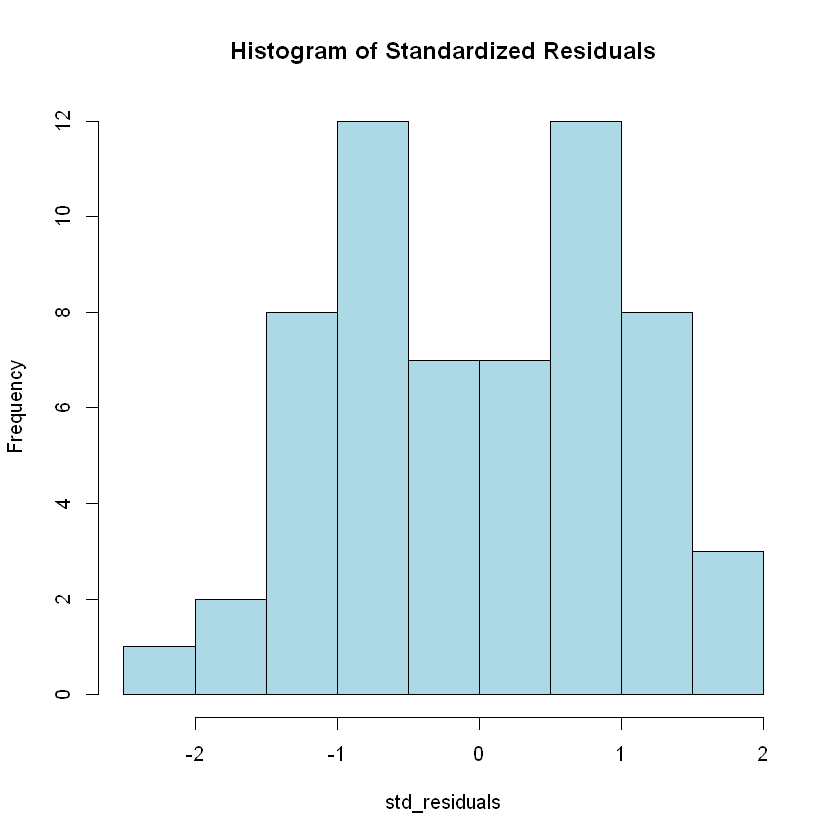


	Shapiro-Wilk normality test

data:  std_residuals
W = 0.97478, p-value = 0.2484



	One Sample t-test

data:  std_residuals
t = -6.1079e-16, df = 59, p-value = 1
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.2583274  0.2583274
sample estimates:
    mean of x 
-7.885222e-17 


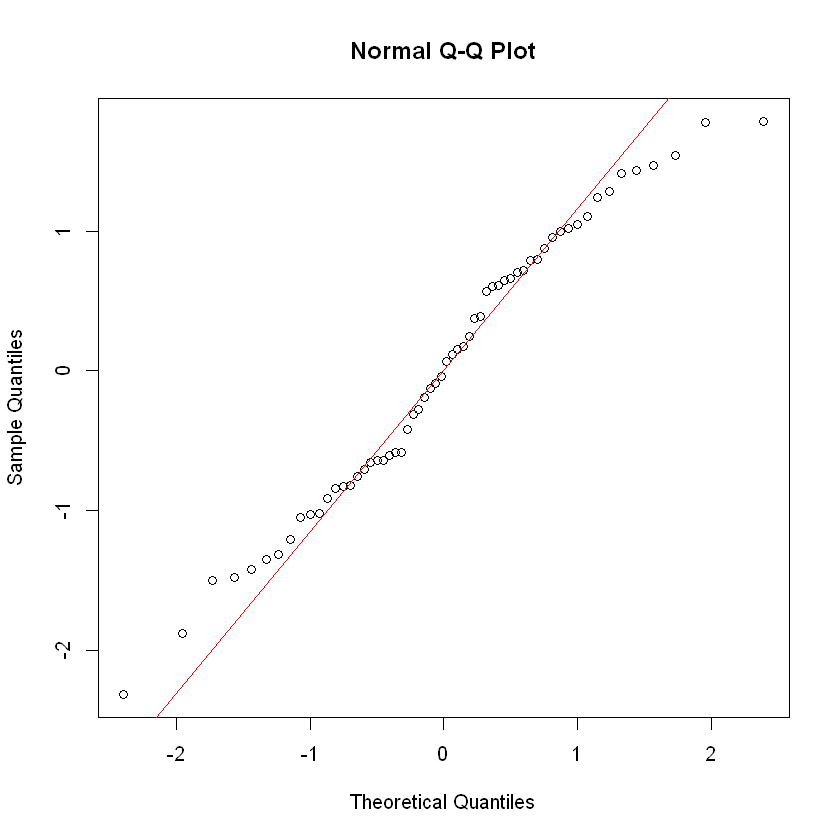

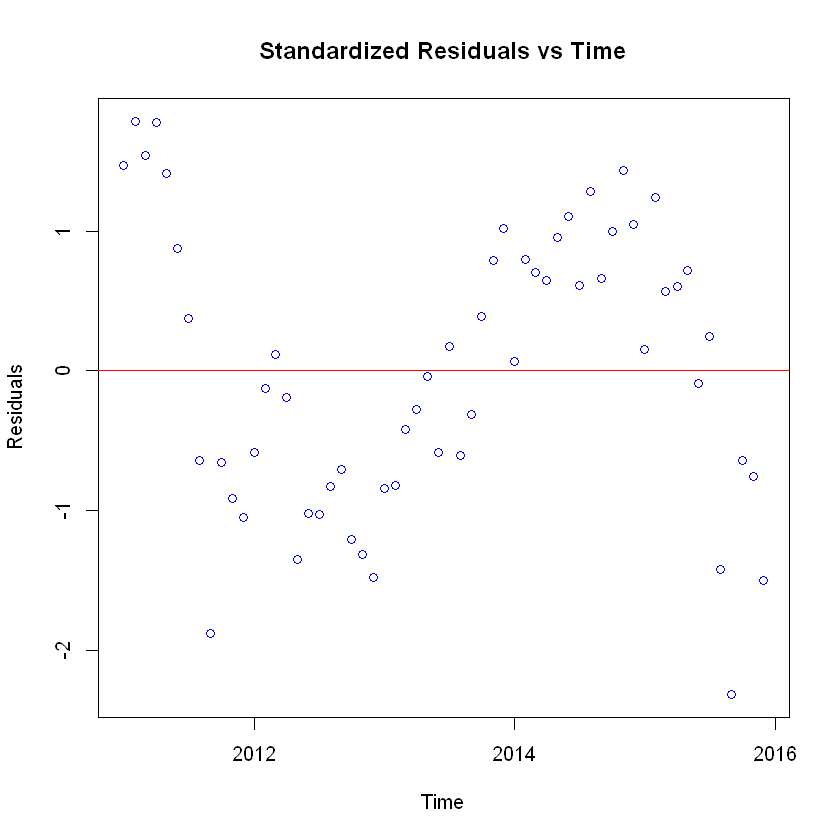

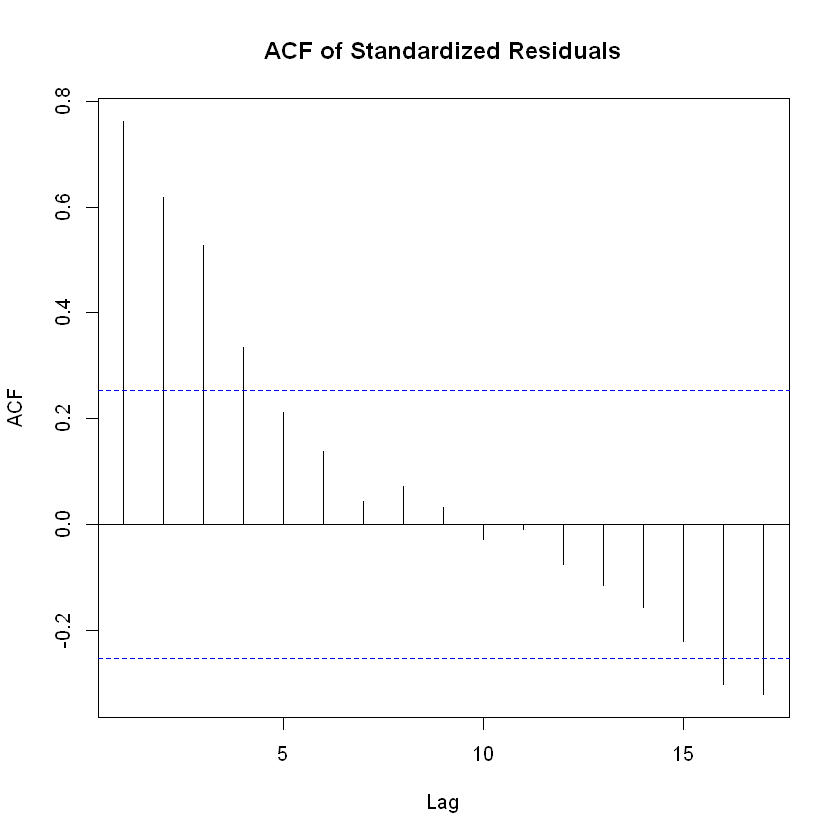

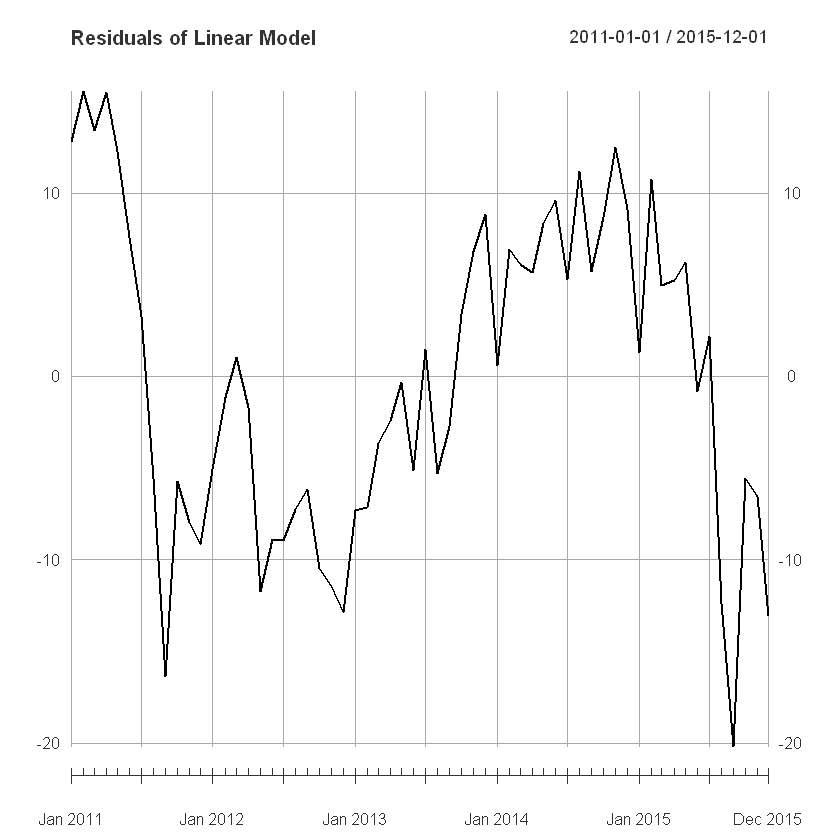

In [ ]:

library(tseries)
residuals <- residuals(model_linear)
std_residuals <- residuals / sd(residuals)
binary_residuals <- ifelse(std_residuals > 0, 1, 0)
runs_test_result <- runs.test(factor(binary_residuals))
print(runs_test_result)
par(bg = "white")
hist(std_residuals, main="Histogram of Standardized Residuals", col="lightblue")
qqnorm(std_residuals)
qqline(std_residuals, col="red")

std_residuals <- as.numeric(std_residuals)
shapiro.test(std_residuals)

par(bg = "white")
plot(time(closing_price), std_residuals, type="p",
     main="Standardized Residuals vs Time",
     xlab="Time", ylab="Residuals", col="blue")
abline(h=0, col="red")

par(bg = "white")
acf(std_residuals, main="ACF of Standardized Residuals")

par(bg = "white")
plot(resid(model_linear), main="Residuals of Linear Model")
abline(h=0, col="red")


>>Residuals Diagnostics:

We can see that a simple linear model might not be appropriate for this data.

There is a wave-shaped curvature in the residuals, which may indicate a higher-order polynomial trend. This deviation from linearity is clearly evident in the residual plots as they still indicate some uncaptured patterns.Also The residual plot shows a clear upward and downward pattern rather than fluctuating randomly around zero, indicating that the residuals do not have a zero mean. The normality assumption is somewhat ambiguous. The histogram and QQ plot suggest deviations from a perfectly normal distribution, but the Shapiro-Wilk test does not provide significant evidence against normality (p = 0.2484). Since the p-value is greater than 0.05, we fail to reject the null hypothesis of normality, meaning the residuals appear normal based on this statistical test, despite some visual deviations . Additionally, the ACF and Runs test both give strong evidence that the data is correlated and that there are some uncovered patterns. The Runs test results show  a p-value of 4.533e-08<0.05, indicating strong evidence of a non-random pattern in the residuals.

Therefore, we can conclude that most assumptions for the simple linear model are violated.


- Since the linear model did not fit the data well we will investigate more using higher order regression models

>>2- Quadratic and Cubic Models

In [ ]:

closing_price_numeric <- as.numeric(coredata(closing_price))
time_index <- seq_along(closing_price_numeric)

model_quad <- lm(closing_price_numeric ~ poly(time_index, 2, raw = TRUE))
summary(model_quad)


model_cubic <- lm(closing_price_numeric ~ poly(time_index, 3, raw = TRUE))
summary(model_cubic)



Call:
lm(formula = closing_price_numeric ~ poly(time_index, 2, raw = TRUE))

Residuals:
     Min       1Q   Median       3Q      Max 
-21.6748  -6.3942   0.8747   7.1634  13.9856 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      1.164e+02  3.525e+00  33.029  < 2e-16 ***
poly(time_index, 2, raw = TRUE)1 1.488e+00  2.667e-01   5.579 6.95e-07 ***
poly(time_index, 2, raw = TRUE)2 3.714e-03  4.237e-03   0.877    0.384    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.8 on 57 degrees of freedom
Multiple R-squared:  0.923,	Adjusted R-squared:  0.9203 
F-statistic: 341.8 on 2 and 57 DF,  p-value: < 2.2e-16



Call:
lm(formula = closing_price_numeric ~ poly(time_index, 3, raw = TRUE))

Residuals:
     Min       1Q   Median       3Q      Max 
-14.0036  -2.7106   0.8037   2.4601   9.5094 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       1.377e+02  2.590e+00  53.170  < 2e-16 ***
poly(time_index, 3, raw = TRUE)1 -2.531e+00  3.647e-01  -6.942 4.32e-09 ***
poly(time_index, 3, raw = TRUE)2  1.671e-01  1.383e-02  12.082  < 2e-16 ***
poly(time_index, 3, raw = TRUE)3 -1.785e-03  1.491e-04 -11.975  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.705 on 56 degrees of freedom
Multiple R-squared:  0.9784,	Adjusted R-squared:  0.9772 
F-statistic:   845 on 3 and 56 DF,  p-value: < 2.2e-16


>>Quadratic Model Fitting Interpretation:


𝑌=116.4+1.488×𝑋+0.003714×𝑋2




Quadratic term (0.003714) accounts for the curvature in the relationship between time and closing price, which is very small with a p-value 0.384 which is not statistically significant. This suggests that the quadratic model might not be necessary as it does not add any significant value compared to the linear model .Its contribution to the adjusted R-squared is just 0.9203, meaning it captures only 0.003 more variance than the linear model, making it largely unnecessary.


>>Cubic Model Fitting Interpretation:
𝑌=137.7−2.531×𝑋+0.1671×𝑋2−0.001785×𝑋3

All coefficients (intercept, linear term, quadratic term, and cubic term) are statistically significant with p-values < 0.001 ,also a bigger R_squared value of 0.9784  meaning that 97.84% of the variance in the closing price is explained by the cubic model, showing a very strong fit.



- Now we look for the cubic and quadratic models residuals diagonostics


	Shapiro-Wilk normality test

data:  resid(model_quad)
W = 0.96736, p-value = 0.1082


	Shapiro-Wilk normality test

data:  resid(model_cubic)
W = 0.95561, p-value = 0.02881


	Runs Test

data:  factor(ifelse(std_residuals_quad > 0, 1, 0))
Standard Normal = -4.9448, p-value = 7.622e-07
alternative hypothesis: two.sided


	Runs Test

data:  factor(ifelse(std_residuals_cubic > 0, 1, 0))
Standard Normal = -1.1166, p-value = 0.2642
alternative hypothesis: two.sided



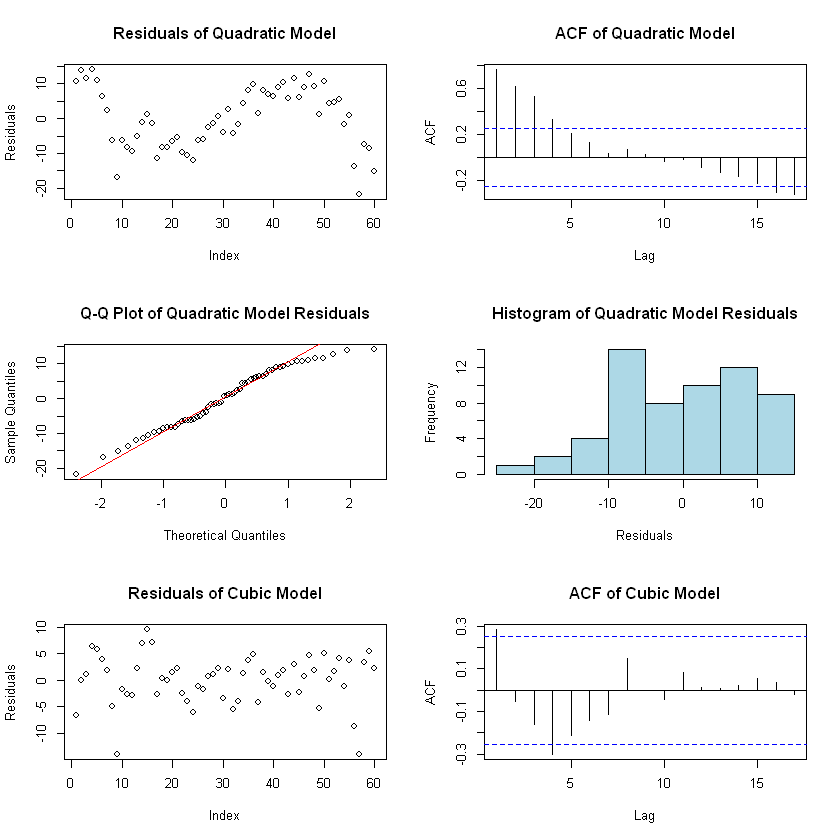

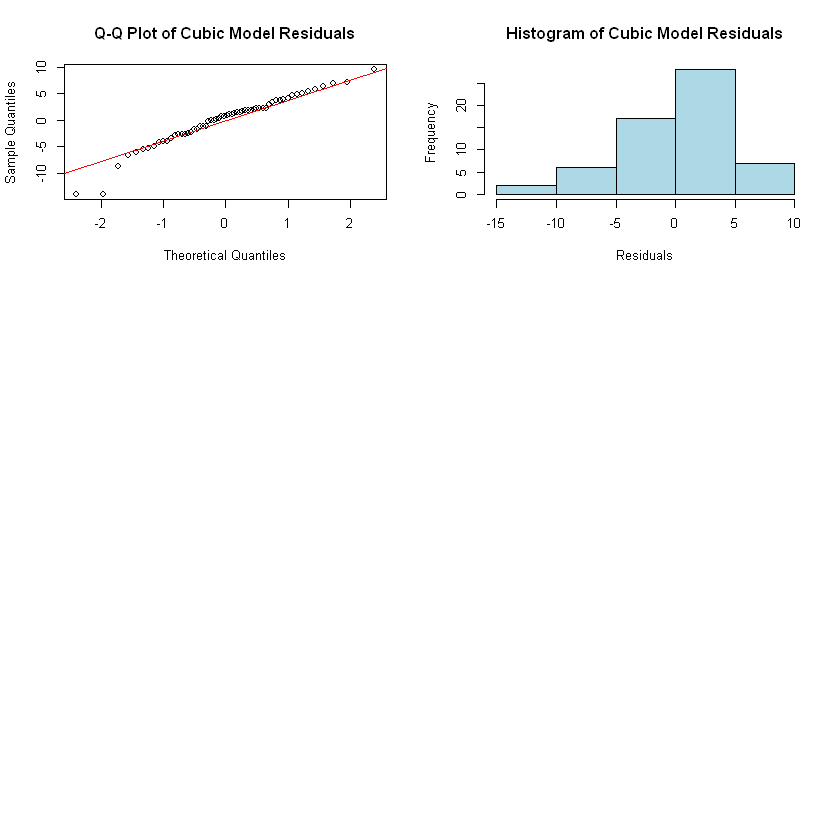

In [ ]:

library(tseries)


std_residuals_quad <- resid(model_quad) / sd(resid(model_quad))
std_residuals_cubic <- resid(model_cubic) / sd(resid(model_cubic))


par(bg = "white")
par(mfrow = c(3, 2))  # Adjust for 3 rows and 2 columns


plot(resid(model_quad), main = "Residuals of Quadratic Model", ylab = "Residuals", xlab = "Index")
acf(resid(model_quad), main = "ACF of Quadratic Model")


qqnorm(resid(model_quad), main = "Q-Q Plot of Quadratic Model Residuals")
qqline(resid(model_quad), col = "red")
hist(resid(model_quad), main = "Histogram of Quadratic Model Residuals", xlab = "Residuals", col = "lightblue", border = "black")


plot(resid(model_cubic), main = "Residuals of Cubic Model", ylab = "Residuals", xlab = "Index")
acf(resid(model_cubic), main = "ACF of Cubic Model")


qqnorm(resid(model_cubic), main = "Q-Q Plot of Cubic Model Residuals")
qqline(resid(model_cubic), col = "red")
hist(resid(model_cubic), main = "Histogram of Cubic Model Residuals", xlab = "Residuals", col = "lightblue", border = "black")


shapiro_quad <- shapiro.test(resid(model_quad))
shapiro_cubic <- shapiro.test(resid(model_cubic))


runs_quad <- runs.test(factor(ifelse(std_residuals_quad > 0, 1, 0)))
runs_cubic <- runs.test(factor(ifelse(std_residuals_cubic > 0, 1, 0)))

print(shapiro_quad)
print(shapiro_cubic)
print(runs_quad)
print(runs_cubic)


>>Residuals Diagnostics:


We can clearly see that The quadratic model has similar ACF and residual plots to the linear model, with residuals still showing a wave-like pattern. The ACF suggests that residuals may still exhibit correlation, indicating that the quadratic model has not fully captured the underlying pattern. Although the Shapiro-Wilk test does not reject normality (p = 0.1082), the histogram and QQ plot indicate deviations from normality, as the residuals do not perfectly align with the theoretical quantile line. This suggests that the residuals may not be perfectly Gaussian. Additionally, the runs test strongly rejects the hypothesis of randomness (p-value = 7.622e-07 < 0.05), indicating that the residuals still exhibit structure. This means that not all assumptions of the quadratic model are validated.

In contrast, the cubic model shows more randomized residuals, suggesting a better fit. The runs test supports this conclusion, as the p-value (0.2642 > 0.05) fails to reject randomness. However, for normality, the Shapiro-Wilk test rejects the null hypothesis (p-value = 0.02881 < 0.05), and the QQ plot confirms deviations from symmetry, particularly in the middle. Despite this, the histogram suggests a distribution that is more normal-like compared to the quadratic model. This indicates that while the residuals are not perfectly normal, the cubic model provides a better approximation. However, we still cannot conclude that the residuals of the cubic model are white noise.






In [ ]:

AIC(model_linear, model_quad, model_cubic)
BIC(model_linear, model_quad, model_cubic)


,df,AIC
,<dbl>,<dbl>
model_linear,3,434.9746
model_quad,4,436.1712
model_cubic,5,361.9738


,df,BIC
,<dbl>,<dbl>
model_linear,3,441.2576
model_quad,4,444.5486
model_cubic,5,372.4455


To further compare these three models, we calculated their BIC and AIC, which confirm that the cubic model is the best fit for our data, capturing its strong trend. This aligns with the fact that the S&P 500 often exhibits complex movements beyond simple linear trends, influenced by economic cycles, volatility, and market corrections.

***Conclusion :***
From the analysis, we can clearly identify a strong trend in the data, which is confirmed by the cubic model. However, the cubic model alone is insufficient to capture all meaningful patterns in the data. The violation of the normality assumption indicates that there are still underlying patterns that the model has not fully accounted for.

As the residuals of the cubic model exhibit deviations from normality, we need to address this by applying differencing. The next step involves checking the stationarity of the residuals. If the residuals of the cubic model are stationary with a zero mean, we can apply differencing up to d=3 to better uncover the hidden patterns behind the observed trend.

> Checking the zero-mean stationarity assumption for the cubic model residuals.

In [ ]:

residuals_cubic <- residuals(model_cubic)


mean_residuals_cubic <- mean(residuals_cubic)
cat("Mean of the cubic model residuals:", mean_residuals_cubic, "\n")


adf_test_result_cubic <- adf.test(residuals_cubic)
cat("ADF Test Result for Cubic Model:\n")
print(adf_test_result_cubic)


if (abs(mean_residuals_cubic) < 0.05) {
  cat("The residuals have a mean close to zero.\n")
} else {
  cat("The residuals do not have a mean close to zero.\n")
}


Mean of the cubic model residuals: 2.294822e-16 


Warning message in adf.test(residuals_cubic):
"p-value smaller than printed p-value"


ADF Test Result for Cubic Model:

	Augmented Dickey-Fuller Test

data:  residuals_cubic
Dickey-Fuller = -5.0917, Lag order = 3, p-value = 0.01
alternative hypothesis: stationary

The residuals have a mean close to zero.


The ADF test confirms that the residuals of the cubic model are stationary, with a mean close to zero (2.294822e-16). Based on this result, we proceed with differencing to ensure stationarity before further modeling.


Note: Fitting the cubic model resulted in stationary residuals, which will be extracted via differencing to apply AR, MA, and ARMA models, as they require stationary data.



>>3- Data Differencing :

In [ ]:
library(forecast)

Warning message:
"package 'forecast' was built under R version 4.4.3"
Registered S3 methods overwritten by 'forecast':
  method       from
  fitted.Arima TSA 
  plot.Arima   TSA 



Since we achieved stationarity by fitting a cubic model, we applied third-order differencing, indicating a strong trend that required multiple differencing steps to eliminate.

***Important NOTE***: A single differencing was insufficient to eliminate the trend, but third-order differencing led to an overfitted model. Therefore, the process was adjusted to use d=2 to achieve stationarity while avoiding overfitting.

Warning message in adf.test(diff_closing_price):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  diff_closing_price
Dickey-Fuller = -6.2156, Lag order = 3, p-value = 0.01
alternative hypothesis: stationary


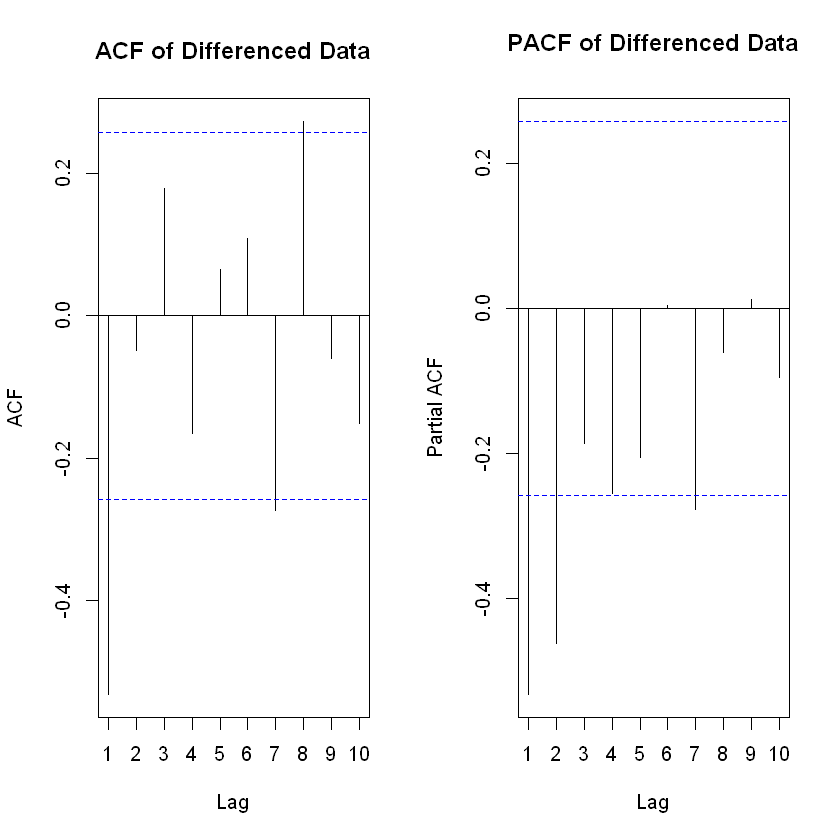

In [ ]:

diff_closing_price <- diff(closing_price, differences = 2)
diff_closing_price <- na.omit(diff_closing_price)


adf.test(diff_closing_price)


par(bg = "white")
par(mfrow = c(1, 2))


acf_result <- acf(diff_closing_price, main = "ACF of Differenced Data", na.action = na.pass, lag.max = 10)
axis(1, at = 1:10, labels = 1:10)

pacf_result <- pacf(diff_closing_price, main = "PACF of Differenced Data", na.action = na.pass, lag.max = 10)


axis(1, at = 1:10, labels = 1:10)

par(mfrow = c(1, 1))


We observe that second-order differencing effectively removed the trend, resulting in a stationary series with a p-value of 0.01 < 0.05 in the ADF test.


Furthermore From the differenced sample acf and pacf we remark that:

ACF: A strong spike in lag 1 then a sharp cutoff suggests an MA(1) process .

PACF : A decay in the pacf with a cutoff in the 2 strike may also suggest a AR(2) beahvior .

Remark: Small spikes outside the confidence interval appear in the ACF at lag 7 and in the PACF at lag 7.These values were considered before, but they resulted an overly complex models with poor performance. Therefore, they are likely due to outliers (e.g., a market crash or a sudden price jump) and will be ignored in the analysis. (The models including these spikes were tested but are not included here due to poor results and to maintain clarity and conciseness.)

Based on the ACF and PACF patterns, we propose the following candidate models:

- ARIMA(0,2,1)

- ARIMA(2,2,0)

- ARIMA(2,2,1)


This allows as to compare different models while maintaning parsimony.




We will also explore other methods, such as ARMA subsets, to expand the range of candidate models.

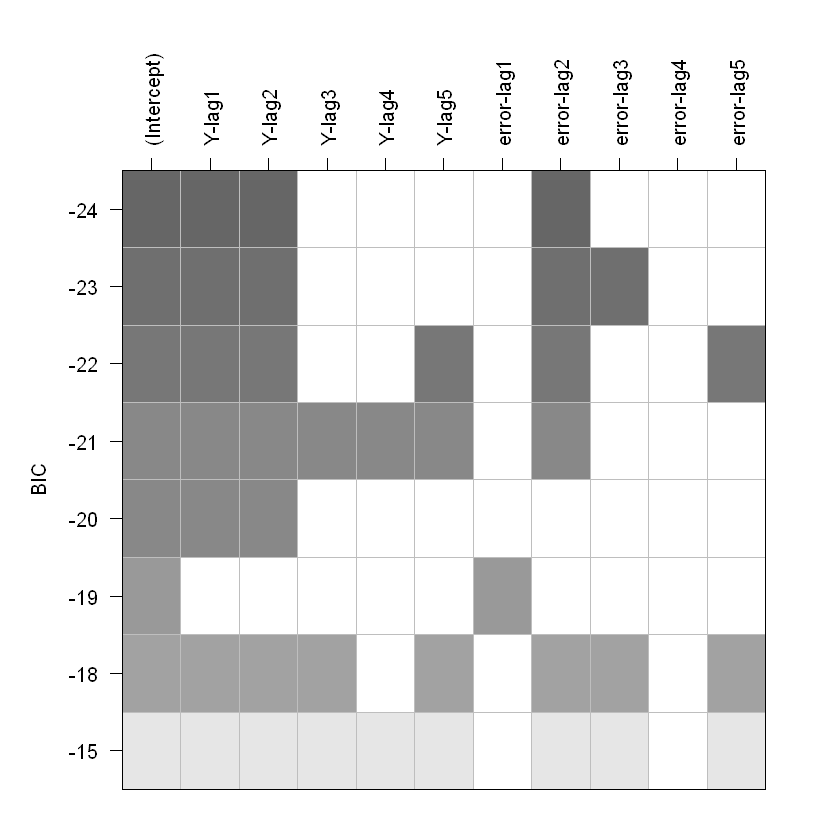

In [ ]:
library(TSA)

par(bg = "white")
plot(armasubsets(y = diff_closing_price, nar = 5, nma = 5))


Since there are no significant spikes at large lags in the PACF, the maximum order for AR and MA terms was limited to 5. Furthermore, stock prices generally depend on the last 1 to 2 months, making a value of 5 sufficient to capture dependencies while avoiding overfitting.

From the ARIMA subset selection chart, we select the models with the lowest BIC (-24), which are ARIMA(1,2,2) and ARIMA(2,2,2). The intercept is ignored, as it becomes null when differencing up to the second order.

We observe that the models suggested by the ARIMA subset selection align with those derived from the ACF and PACF analysis, with the only difference being a higher MA order (2).

The final set of candidate models includes:

- ARIMA(1,2,2)

- ARIMA(2,2,2)

- ARIMA(0,2,1)

- ARIMA(2,2,0)

- ARIMA(2,2,1)

# 3- Fitting and Diagnostics

>>In this section, we will fit our candidate models by estimating their parameters. We will then compare them using criteria such as BIC and AIC, followed by residual diagnostics to determine the best-fitting model.

**a-Parameters Estimation:**

In [ ]:
install.packages("forecast")


Warning message:
"package 'forecast' is in use and will not be installed"


Since most of our candidate models contain MA components, we will rely on Maximum Likelihood Estimation (MLE) for parameter estimation, as it is the most widely used and reliable method. The Method of Moments (MOM) is avoided because it is generally unsuitable for MA models. Additionally, we will not use Conditional Least Squares (CLS), as it is primarily used for AR models, and our focus is on models that include MA components. Therefore, MLE will be exclusively used for parameter estimation.

In [ ]:
# Define candidate models with MLE (default)
candidates_mle <- list(
  "ARIMA(1,2,2) MLE" = arima(closing_price, order = c(1, 2, 2), method = "ML"),
  "ARIMA(2,2,2) MLE" = arima(closing_price, order = c(2, 2, 2), method = "ML"),
  "ARIMA(0,2,1) MLE" = arima(closing_price, order = c(0, 2, 1), method = "ML"),
  "ARIMA(2,2,0) MLE" = arima(closing_price, order = c(2, 2, 0), method = "ML"),
  "ARIMA(2,2,1) MLE" = arima(closing_price, order = c(2, 2, 1), method = "ML")
)



Using the arima function with the method set to "MLE," we ensure that parameter estimation is done through Maximum Likelihood Estimation (MLE). In the next section, we will display the estimated parameters for each candidate model.

In [ ]:

print_arima_mle <- function(candidates_mle) {
  models <- names(candidates_mle)

  for (model in models) {
    cat("\n-----------------------------------\n")
    cat("Model:", model, "\n")
    cat("-----------------------------------\n")

    mle_values <- coef(candidates_mle[[model]])  # Extract estimated parameters


    names(mle_values) <- gsub("^ar", "phi", names(mle_values))
    names(mle_values) <- gsub("^ma", "theta", names(mle_values))

    # Convert named vector to data frame format
    df <- data.frame(
      Parameter = names(mle_values),
      MLE = mle_values
    )

    print(df, row.names = FALSE)
  }
}

print_arima_mle(candidates_mle)



-----------------------------------
Model: ARIMA(1,2,2) MLE 
-----------------------------------
 Parameter        MLE
      phi1  0.1443037
    theta1 -1.3817320
    theta2  0.3817454

-----------------------------------
Model: ARIMA(2,2,2) MLE 
-----------------------------------
 Parameter        MLE
      phi1 -0.6618683
      phi2 -0.2594060
    theta1 -0.5641012
    theta2 -0.4358976

-----------------------------------
Model: ARIMA(0,2,1) MLE 
-----------------------------------
 Parameter        MLE
    theta1 -0.9999996

-----------------------------------
Model: ARIMA(2,2,0) MLE 
-----------------------------------
 Parameter        MLE
      phi1 -0.8281263
      phi2 -0.5303446

-----------------------------------
Model: ARIMA(2,2,1) MLE 
-----------------------------------
 Parameter        MLE
      phi1 -0.2374220
      phi2 -0.1597485
    theta1 -0.9999913


After estimating the parameters, we will compare the candidate models using BIC and AIC metrics to identify the best fit.

In [ ]:
# Compute AIC and BIC for each model
model_metrics <- data.frame(
  Model = names(candidates_mle),
  AIC = sapply(candidates_mle, AIC),
  BIC = sapply(candidates_mle, BIC)
)

# Sort by AIC (best model at the top)
model_metrics <- model_metrics[order(model_metrics$AIC), ]
print(model_metrics)


                            Model      AIC      BIC
ARIMA(0,2,1) MLE ARIMA(0,2,1) MLE 371.2764 375.3973
ARIMA(2,2,1) MLE ARIMA(2,2,1) MLE 371.4752 379.7170
ARIMA(1,2,2) MLE ARIMA(1,2,2) MLE 372.1848 380.4266
ARIMA(2,2,2) MLE ARIMA(2,2,2) MLE 372.8123 383.1145
ARIMA(2,2,0) MLE ARIMA(2,2,0) MLE 383.4454 389.6268


The AIC and BIC values are sorted from smallest to largest. We clearly observe that BIC favors simpler models over more complex ones, as the difference between AIC and BIC values increases with model complexity. Furthermore, both AIC and BIC recommend ARIMA(0,2,1) and ARIMA(2,2,1), which were also suggested by the ACF and PACF analysis. This consistency reinforces confidence in our selected candidates. To finalize our model selection, we proceed with residual diagnostics for these two models.

**b-Residuals Diagonostics:**

For residual diagnostics, we will use the Ljung-Box test to check whether the residuals exhibit white noise. Additionally, we will perform the Shapiro-Wilk test for normality and the Runs test for autocorrelation. These tests will be supported by visual diagnostics, including histograms, QQ plots, and ACF/PACF plots for both models.

Warning message:
"package 'gridExtra' was built under R version 4.4.3"



===== Residual Analysis for ARIMA(0,2,1) =====
Ljung-Box test p-value: 0.1985586 
Runs test p-value: 1 
Shapiro-Wilk test p-value: 0.513779 


Warning message:
"The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead."
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.



===== Residual Analysis for ARIMA(2,2,1) =====
Ljung-Box test p-value: 0.864666 
Runs test p-value: 0.6024849 
Shapiro-Wilk test p-value: 0.3342251 


Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


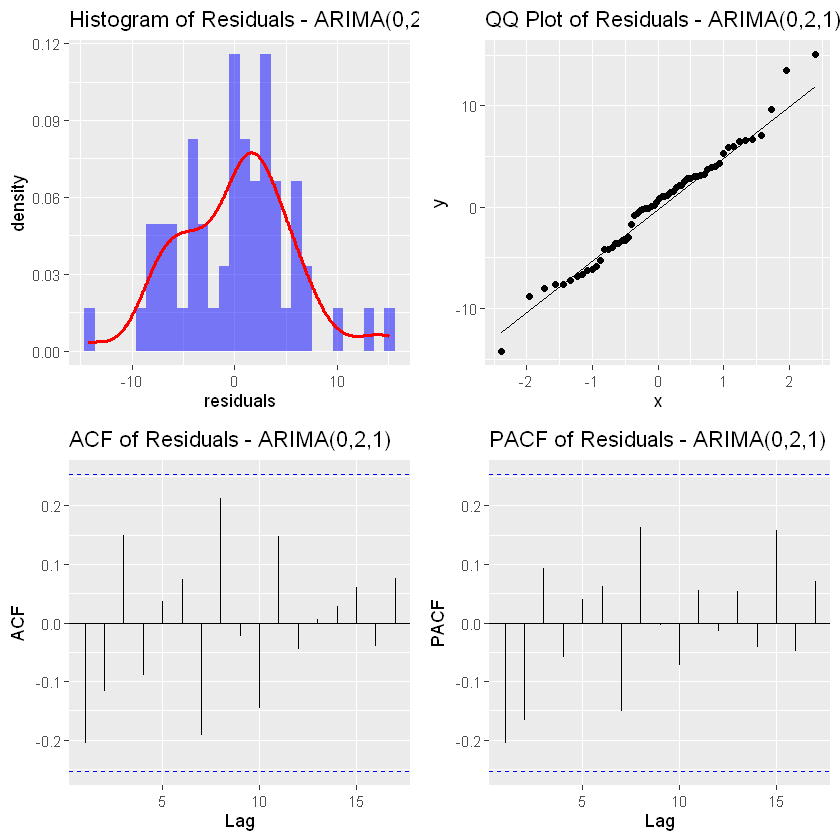

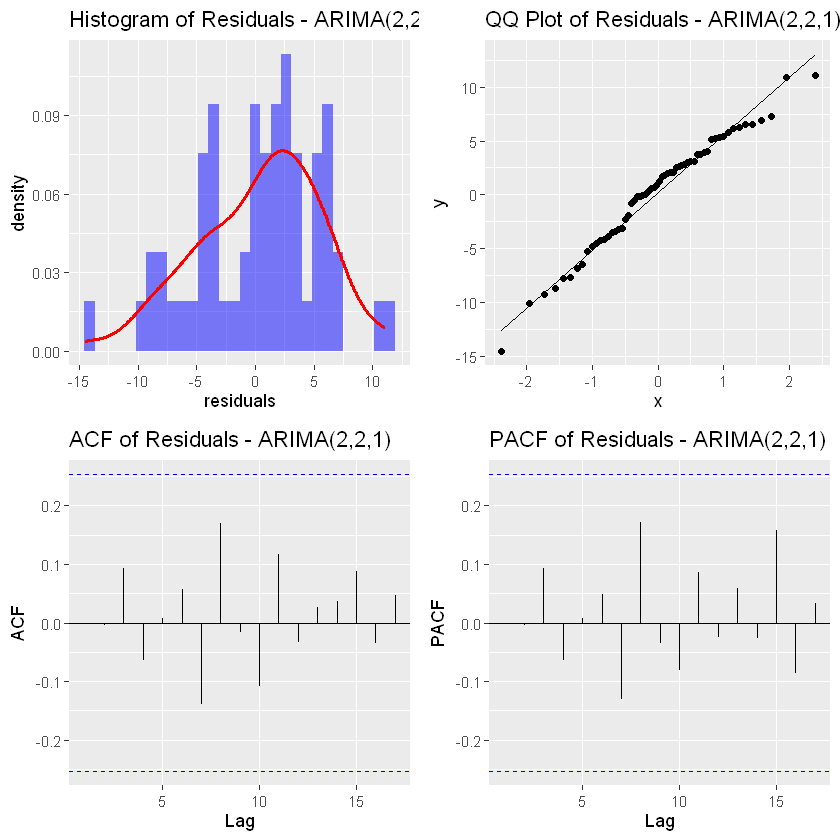

In [ ]:
library(tseries)
library(ggplot2)
library(gridExtra)

# Define models
best_models <- list(
  "ARIMA(0,2,1)" = arima(closing_price, order = c(0, 2, 1), method = "ML"),
  "ARIMA(2,2,1)" = arima(closing_price, order = c(2, 2, 1),, method = "ML")
)

# Function for residual analysis
analyze_residuals <- function(model, name) {
  residuals <- residuals(model)

  # Ljung-Box test (Autocorrelation)
  ljung_test <- Box.test(residuals, lag = 10, type = "Ljung-Box")

  # Runs test (Randomness) - Convert residuals to binary (above/below median)
  binary_residuals <- factor(residuals > median(residuals))
  runs_test <- runs.test(binary_residuals)

  # Shapiro-Wilk test (Normality)
  shapiro_test <- shapiro.test(residuals)

  # Create plots
  p1 <- ggplot(data.frame(residuals), aes(x = residuals)) +
    geom_histogram(aes(y = ..density..), bins = 30, fill = "blue", alpha = 0.5) +
    geom_density(color = "red", size = 1) +
    ggtitle(paste("Histogram of Residuals -", name))

  p2 <- ggplot(data.frame(residuals), aes(sample = residuals)) +
    stat_qq() + stat_qq_line() +
    ggtitle(paste("QQ Plot of Residuals -", name))

  # ACF and PACF plots
  acf_plot <- ggAcf(residuals) + ggtitle(paste("ACF of Residuals -", name))
  pacf_plot <- ggPacf(residuals) + ggtitle(paste("PACF of Residuals -", name))

  # Print diagnostics
  cat("\n===== Residual Analysis for", name, "=====\n")
  cat("Ljung-Box test p-value:", ljung_test$p.value, "\n")
  cat("Runs test p-value:", runs_test$p.value, "\n")
  cat("Shapiro-Wilk test p-value:", shapiro_test$p.value, "\n")

  # Plot all together
  grid.arrange(p1, p2, acf_plot, pacf_plot, ncol = 2)
}

# Perform analysis for both models
for (name in names(best_models)) {
  analyze_residuals(best_models[[name]], name)
}


Both the ARIMA(0,2,1) and ARIMA(2,2,1) models perform well based on residual diagnostics. The Ljung-Box test results show that both models have p-values greater than 0.05, indicating no significant autocorrelation in the residuals. This is further confirmed by the ACF and PACF plots, where all spikes remain within the confidence intervals, verifying that the residuals of both models are uncorrelated and suggesting a good fit.

Similarly, the Runs test for randomness reveals high p-values for both models (ARIMA(0,2,1): p = 1, ARIMA(2,2,1): p = 0.6025), strengthening the conclusions drawn from the ACF, PACF, and Ljung-Box tests that the residuals appear random with no meaningful patterns. The Shapiro-Wilk test further supports normality, as both models have p-values greater than 0.05 (ARIMA(0,2,1): p = 0.5138, ARIMA(2,2,1): p = 0.3343), confirming that the residuals are normally distributed. This is also evident from the QQ plots, where the residuals align well with the reference line with minor deviations at the tails, and the histogram, which suggests that the residuals can be considered approximately normal.

In summary, both models passed the residual diagnostic tests, indicating that they successfully captured the necessary patterns, resulting in white noise residuals (zero mean, constant variance, uncorrelated, and normally distributed). To select the best model, we will consider the one with the smallest AIC and BIC values while following the principle of parsimony, which favors the simplest model. Based on these criteria, we prefer the ARIMA(0,2,1) model with the parameter θ₁ = -0.9999996.

**Conclusion :**

The ARIMA(0,2,1) model is suggested as the best fit for this data.

Potential Model Deficiencies: While this model performs well based on residual diagnostics, it may be overly simplistic given the nature of financial data, which often exhibits significant fluctuations. The MA(1) component assumes correlation only at lag l = 1, producing constant mean predictions for l > 1. This could result in overly linear forecasts, potentially failing to capture the curvature and volatility inherent in financial time series. As a result, the model may not be ideal for highly volatile datasets.

# 5-Forecasting:

In this section, we assess the ability of our model to predict future data.

We evaluate the model on unseen data, specifically 6 months (equivalent to 1% of the training data Size).

The model’s performance is measured using plots and statistical tests, including:

- Mean Squared Error (MSE)
- Mean Absolute Error (MAE)
- Root Mean Squared Error (RMSE)
- R-squared (R²)


By analyzing these metrics alongside visualization tools (such as forecast plots ), we can determine the reliability of our model’s predictions.

 We will forecast the next six months, display the predicted values, and visualize the results.

          Jan      Feb      Mar      Apr      May      Jun
2016 205.1444 206.4188 207.6932 208.9676 210.2421 211.5165


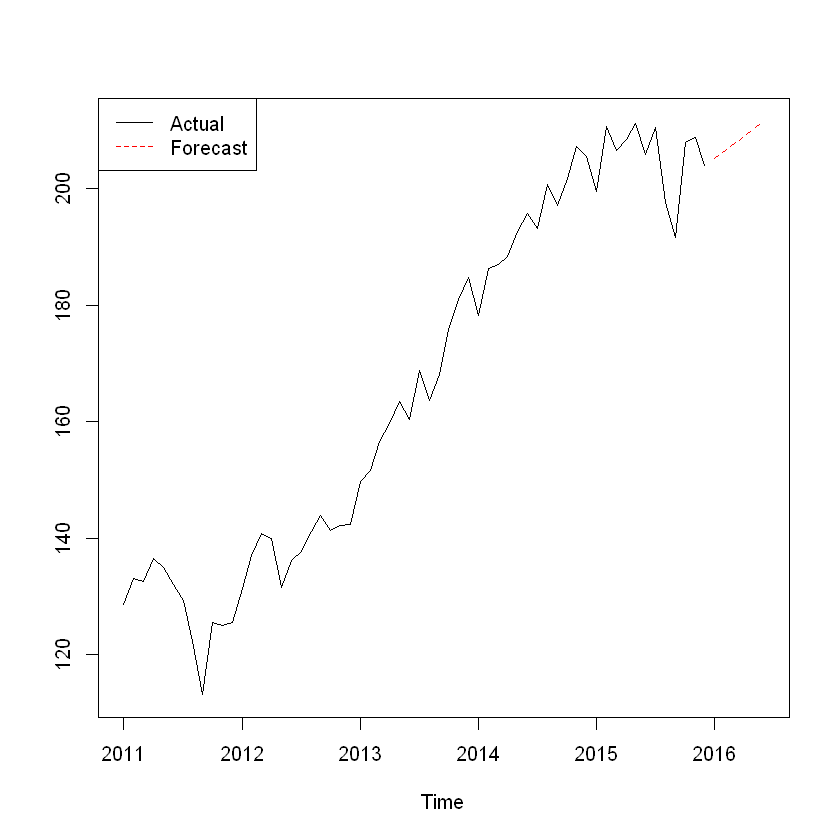

In [ ]:
# Predict next 10 months
forecast_0_2_1 <- predict(model_0_2_1, n.ahead = 6)


# Print predictions
print(forecast_0_2_1$pred)

par(bg = "white")
# Plot results
ts.plot(closing_price_ts, forecast_0_2_1$pred, col = c("black", "red"), lty = c(1,2))
legend("topleft", legend = c("Actual", "Forecast"), col = c("black", "red"), lty = c(1,2))


As expected, the predicted values for the next six months exhibit a linear pattern due to the simplicity of our model. To assess its performance, the next step is to compare these predictions with the actual values.

In [ ]:
install.packages("caret")


Installing package into 'C:/Users/ayadi/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)

also installing the dependencies 'listenv', 'parallelly', 'future', 'globals', 'shape', 'future.apply', 'progressr', 'SQUAREM', 'diagram', 'lava', 'cli', 'prodlim', 'proxy', 'iterators', 'clock', 'gower', 'hardhat', 'ipred', 'sparsevctrs', 'e1071', 'foreach', 'ModelMetrics', 'plyr', 'pROC', 'recipes', 'reshape2'




package 'listenv' successfully unpacked and MD5 sums checked
package 'parallelly' successfully unpacked and MD5 sums checked
package 'future' successfully unpacked and MD5 sums checked
package 'globals' successfully unpacked and MD5 sums checked
package 'shape' successfully unpacked and MD5 sums checked
package 'future.apply' successfully unpacked and MD5 sums checked
package 'progressr' successfully unpacked and MD5 sums checked
package 'SQUAREM' successfully unpacked and MD5 sums checked
package 'diagram' successfully unpacked and MD5 sums checked
package 'lava' successfully unpacked and MD5 sums checked
package 'cli' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'cli'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\ayadi\AppData\Local\R\win-library\4.4\00LOCK\cli\libs\x64\cli.dll to C:\Users\ayadi\AppData\Local\R\win-library\4.4\cli\libs\x64\cli.dll: Permission denied"
Warning message:
"restored 'cli'"


package 'prodlim' successfully unpacked and MD5 sums checked
package 'proxy' successfully unpacked and MD5 sums checked
package 'iterators' successfully unpacked and MD5 sums checked
package 'clock' successfully unpacked and MD5 sums checked
package 'gower' successfully unpacked and MD5 sums checked
package 'hardhat' successfully unpacked and MD5 sums checked
package 'ipred' successfully unpacked and MD5 sums checked
package 'sparsevctrs' successfully unpacked and MD5 sums checked
package 'e1071' successfully unpacked and MD5 sums checked
package 'foreach' successfully unpacked and MD5 sums checked
package 'ModelMetrics' successfully unpacked and MD5 sums checked
package 'plyr' successfully unpacked and MD5 sums checked
package 'pROC' successfully unpacked and MD5 sums checked
package 'recipes' successfully unpacked and MD5 sums checked
package 'reshape2' successfully unpacked and MD5 sums checked
package 'caret' successfully unpacked and MD5 sums checked

The downloaded binary package

In [ ]:
library(quantmod)
library(Metrics)
library(caret)

# Get actual S&P 500 data for Jan 2016 - June 2016
getSymbols("SPY", from = "2016-01-01", to = "2016-06-30", src = "yahoo", periodicity = "monthly")
real_values <- as.numeric(Cl(SPY))  # Convert closing prices to numeric


n_forecast <- length(real_values)


forecast_0_2_1 <- predict(model_0_2_1, n.ahead = n_forecast)

predicted_values <- forecast_0_2_1$pred
forecast_errors <- forecast_0_2_1$se

# Compute MSE (Mean Squared Error)
mse <- mean((predicted_values - real_values)^2)

# Compute RMSE (Root Mean Squared Error)
rmse <- sqrt(mse)

# Compute MAE (Mean Absolute Error)
mae_value <- mae(real_values, predicted_values)

# Compute R-squared (R²)
r2_value <- R2(predicted_values, real_values)

# Print results
print(paste("MSE for ARIMA(0,2,1):", mse))
print(paste("RMSE for ARIMA(0,2,1):", rmse))
print(paste("MAE for ARIMA(0,2,1):", mae_value))
print(paste("R-squared (R²) for ARIMA(0,2,1):", r2_value))


[1] "SPY"

[1] "MSE for ARIMA(0,2,1): 51.9759078829775"
[1] "RMSE for ARIMA(0,2,1): 7.20943186963976"
[1] "MAE for ARIMA(0,2,1): 5.25544202062945"
[1] "R-squared (R²) for ARIMA(0,2,1): 0.837577532690893"




The MSE shows that the predictions of our model deviates from the actual values with 51.97 which appears to be relatively high compared to the other metrics, likely because MSE penalizes larger errors more heavily. In contrast, the MAE provides a more balanced measure of error, showing a reasonable value. The R² value of 0.837 suggests that the model explains a significant portion of the variance in the actual data, indicating a good fit. The RMSE is 7.21, which will be further investigated by comparing it to the range of actual values. Additionally, we will plot the differences between real and predicted values to better understand and justify the cause of high MSE .

Now, we will evaluate whether the RMSE value is acceptable by comparing it to the range of our S&P 500 data, including the testing portion. This will help determine if the error is relatively high or justifiable within this domain-specific case study. If the RMSE is small relative to the data range, the model's predictions can be considered reasonably accurate.

In [ ]:
getSymbols("SPY", from = "2011-01-01", to = "2016-06-30", src = "yahoo", periodicity = "monthly")
closing_prices <- as.numeric(Cl(SPY))

# Get min, max, and range from the entire dataset (training + testing)
min_price <- min(closing_prices)
max_price <- max(closing_prices)
price_range <- max_price - min_price

# Calculate acceptable RMSE range (5-10% of the price range)
acceptable_rmse_lower <- 0.05 * price_range
acceptable_rmse_upper <- 0.10 * price_range

# Print range information
print(paste("Min price:", round(min_price, 2)))
print(paste("Max price:", round(max_price, 2)))
print(paste("Price range:", round(price_range, 2)))
print(paste("Acceptable RMSE range: 5% to 10% of price range = [", round(acceptable_rmse_lower, 2), ", ", round(acceptable_rmse_upper, 2), "]", sep=""))

# Assuming 'rmse' is calculated elsewhere in the code
if (rmse >= acceptable_rmse_lower && rmse <= acceptable_rmse_upper) {
  print("The RMSE is within the acceptable range of 5-10% of the price range, suggesting good model accuracy.")
} else {
  print("The RMSE is outside the acceptable range, indicating potential issues with prediction accuracy.")
}


[1] "SPY"

[1] "Min price: 113.15"
[1] "Max price: 211.14"
[1] "Price range: 97.99"
[1] "Acceptable RMSE range: 5% to 10% of price range = [4.9, 9.8]"
[1] "The RMSE is within the acceptable range of 5-10% of the price range, suggesting good model accuracy."


- So we have tested the RMSE value based on the data range with 5% to 10% range of error is acceptable as financial time series predictions, especially for assets like the S&P 500, often cannot achieve an RMSE lower than 5% of the real data range due to the unpredictability of the market.

As a result, we can accept our RMSE value of ~7, though it is still a little bit high.

Now to investigate on the high mse value we will plot the predicted values along with the real value

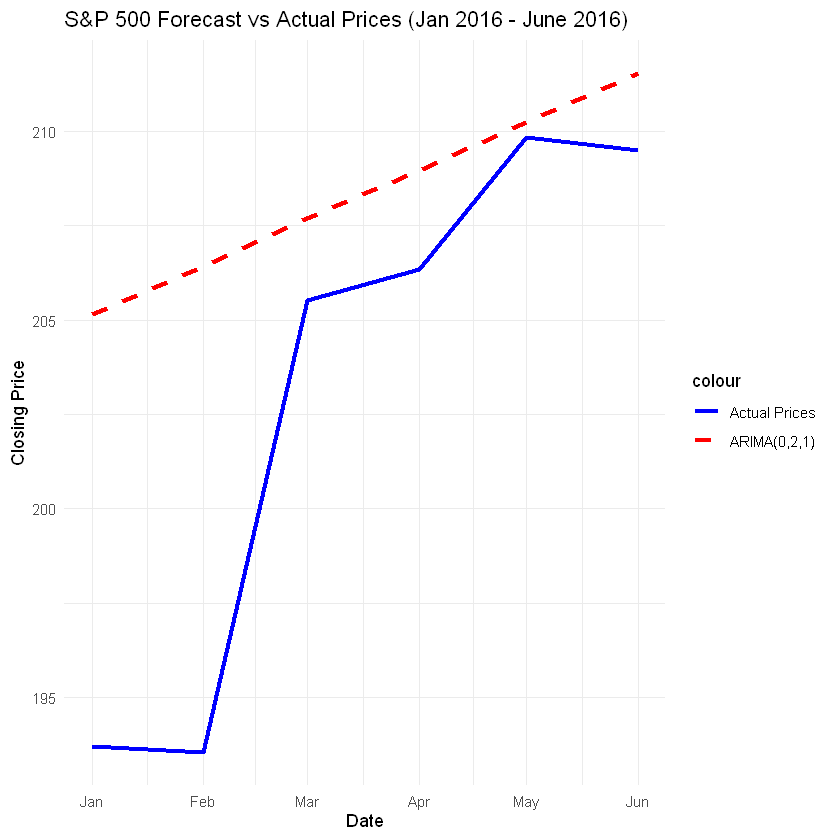

In [ ]:

df_forecast <- data.frame(
  Date = forecast_dates,
  ARIMA_0_2_1 = as.numeric(forecast_0_2_1$pred[1:forecast_length]),
  Actual = as.numeric(real_values_trimmed)
)


ggplot(df_forecast, aes(x = Date)) +
  geom_line(aes(y = Actual, color = "Actual Prices"), size = 1.2) +
  geom_line(aes(y = ARIMA_0_2_1, color = "ARIMA(0,2,1)"), linetype = "dashed", size = 1.2) +
  labs(title = "S&P 500 Forecast vs Actual Prices (Jan 2016 - June 2016)",
       x = "Date",
       y = "Closing Price") +
  scale_color_manual(values = c("Actual Prices" = "blue",
                                "ARIMA(0,2,1)" = "red")) +
  theme_minimal()


>> The high MSE is mainly due to the model missing sharp changes, especially in February. Since MSE gives more weight to large errors, the big gap between the actual and predicted values for that month caused the high MSE . To improve and better capture these complexities, we will explore higher-order AR models and auto-generated models to make a final decision on our model's performance.

first we are going to find the model suggested by auto arima

In [ ]:
library(forecast)
library(quantmod)

auto_arima_model <- auto.arima(closing_price)
summary(auto_arima_model)
forecast_auto_arima <- forecast(auto_arima_model, h = 6)

Series: closing_price 
ARIMA(0,1,1) with drift 

Coefficients:
          ma1   drift
      -0.2727  1.2863
s.e.   0.1324  0.5073

sigma^2 = 29.33:  log likelihood = -182.41
AIC=370.82   AICc=371.26   BIC=377.06

Training set error measures:
                     ME     RMSE      MAE         MPE     MAPE      MASE
Training set 0.01631199 5.278977 4.179014 -0.08260814 2.580794 0.9079125
                   ACF1
Training set 0.01598096

The auto arima has suggested random walk means the values of the future  are unpredictable ,next step is to forecast using other models with higher AR component along with their R2 ,MSE ,MAE to verify our choice

[1] "RMSE for ARIMA(0,1,1) : 9.36678033268798"
[1] "MAE for ARIMA(0,1,1) : 6.52005568618003"
[1] "R² for ARIMA(0,1,1) : -0.8706"
[1] "RMSE for ARIMA(2,1,1) : 9.15622373663477"
[1] "MAE for ARIMA(2,1,1) : 6.40699160714308"
[1] "R² for ARIMA(2,1,1) : -0.7875"
[1] "RMSE for ARIMA(2,2,1) : 11.9088690140121"
[1] "MAE for ARIMA(2,2,1) : 10.8274903354899"
[1] "R² for ARIMA(2,2,1) : -2.0238"
[1] "RMSE for ARIMA(2,2,2) : 11.8367231825408"
[1] "MAE for ARIMA(2,2,2) : 10.7421396018743"
[1] "R² for ARIMA(2,2,2) : -1.9872"


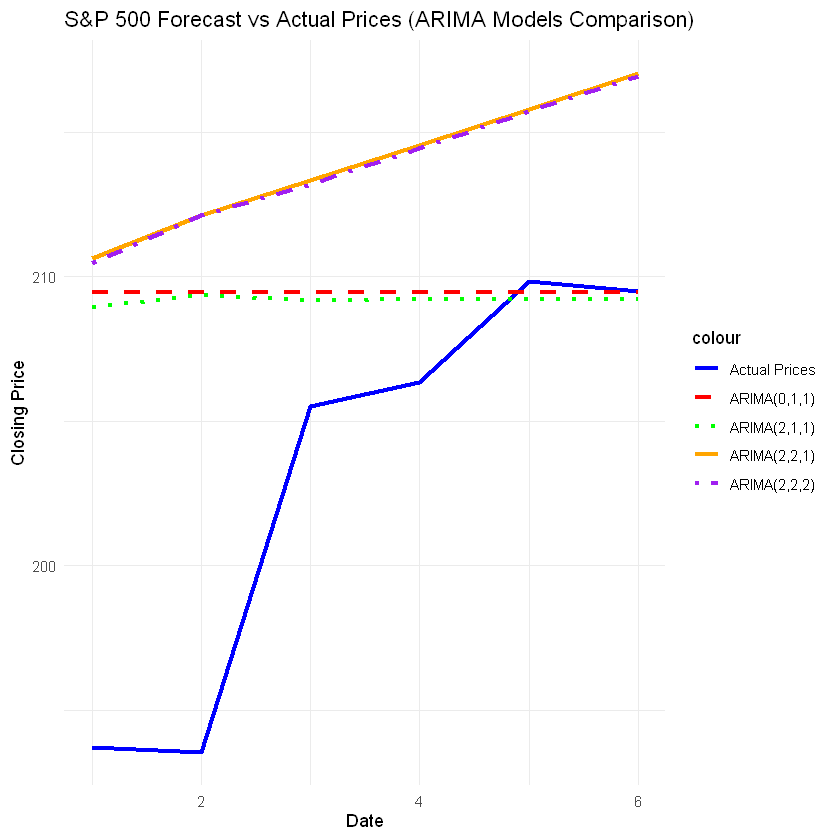

In [ ]:
library(forecast)
library(ggplot2)


arima_0_1_1 <- Arima(closing_prices, order = c(0,1,1))
arima_2_1_1 <- Arima(closing_prices, order = c(2,1,1))
arima_2_2_1 <- Arima(closing_prices, order = c(2,2,1))
arima_2_2_2 <- Arima(closing_prices, order = c(2,2,2))

forecast_0_1_1 <- forecast(arima_0_1_1, h = 6)
forecast_2_1_1 <- forecast(arima_2_1_1, h = 6)
forecast_2_2_1 <- forecast(arima_2_2_1, h = 6)
forecast_2_2_2 <- forecast(arima_2_2_2, h = 6)


forecast_length <- min(length(forecast_0_1_1$mean), length(real_values))
forecast_dates <- index(real_values)[1:forecast_length]
real_values_trimmed <- real_values[1:forecast_length]


df_forecast <- data.frame(
  Date = forecast_dates,
  ARIMA_0_1_1 = as.numeric(forecast_0_1_1$mean[1:forecast_length]),
  ARIMA_2_1_1 = as.numeric(forecast_2_1_1$mean[1:forecast_length]),
  ARIMA_2_2_1 = as.numeric(forecast_2_2_1$mean[1:forecast_length]),
  ARIMA_2_2_2 = as.numeric(forecast_2_2_2$mean[1:forecast_length]),
  Actual = as.numeric(real_values_trimmed)
)

# Calculate RMSE, MAE, and R² for each model
rmse_values <- c(
  sqrt(mean((df_forecast$ARIMA_0_1_1 - df_forecast$Actual)^2)),
  sqrt(mean((df_forecast$ARIMA_2_1_1 - df_forecast$Actual)^2)),
  sqrt(mean((df_forecast$ARIMA_2_2_1 - df_forecast$Actual)^2)),
  sqrt(mean((df_forecast$ARIMA_2_2_2 - df_forecast$Actual)^2))
)

mae_values <- c(
  mean(abs(df_forecast$ARIMA_0_1_1 - df_forecast$Actual)),
  mean(abs(df_forecast$ARIMA_2_1_1 - df_forecast$Actual)),
  mean(abs(df_forecast$ARIMA_2_2_1 - df_forecast$Actual)),
  mean(abs(df_forecast$ARIMA_2_2_2 - df_forecast$Actual))
)

r_squared_values <- c(
  1 - sum((df_forecast$ARIMA_0_1_1 - df_forecast$Actual)^2) / sum((df_forecast$Actual - mean(df_forecast$Actual))^2),
  1 - sum((df_forecast$ARIMA_2_1_1 - df_forecast$Actual)^2) / sum((df_forecast$Actual - mean(df_forecast$Actual))^2),
  1 - sum((df_forecast$ARIMA_2_2_1 - df_forecast$Actual)^2) / sum((df_forecast$Actual - mean(df_forecast$Actual))^2),
  1 - sum((df_forecast$ARIMA_2_2_2 - df_forecast$Actual)^2) / sum((df_forecast$Actual - mean(df_forecast$Actual))^2)
)

model_names <- c("ARIMA(0,1,1)", "ARIMA(2,1,1)", "ARIMA(2,2,1)", "ARIMA(2,2,2)")

# Print RMSE, MAE, and R² values
for (i in 1:length(model_names)) {
  print(paste("RMSE for", model_names[i], ":", rmse_values[i]))
  print(paste("MAE for", model_names[i], ":", mae_values[i]))
  print(paste("R² for", model_names[i], ":", round(r_squared_values[i], 4)))
}

# **Step 2: Plot the Results**
ggplot(df_forecast, aes(x = Date)) +
  geom_line(aes(y = Actual, color = "Actual Prices"), size = 1.2) +
  geom_line(aes(y = ARIMA_0_1_1, color = "ARIMA(0,1,1)"), linetype = "dashed", size = 1.2) +
  geom_line(aes(y = ARIMA_2_1_1, color = "ARIMA(2,1,1)"), linetype = "dotted", size = 1.2) +
  geom_line(aes(y = ARIMA_2_2_1, color = "ARIMA(2,2,1)"), linetype = "solid", size = 1.2) +
  geom_line(aes(y = ARIMA_2_2_2, color = "ARIMA(2,2,2)"), linetype = "dotdash", size = 1.2) +
  labs(title = "S&P 500 Forecast vs Actual Prices (ARIMA Models Comparison)",
       x = "Date",
       y = "Closing Price") +
  scale_color_manual(values = c(
    "Actual Prices" = "blue",
    "ARIMA(0,1,1)" = "red",
    "ARIMA(2,1,1)" = "green",
    "ARIMA(2,2,1)" = "orange",
    "ARIMA(2,2,2)" = "purple"
  )) +
  theme_minimal()


After testing more complex models, including the one suggested by auto.arima (ARIMA(0,1,1)), we can see that our selected model has the lowest RMSE ,MAE .Also we remark that these model R-squared values are negative indicating  that the model is performing worse than simply using the mean of the actual values to predict the future . Additionally, in the visualization, the other models appear to deviate significantly from the actual values.

We can observe that adding AR components and complex models such that ARIMA(2,2,1) and ARIMA(2,2,2) lead to  worse performance , with much more negative R² values (around -2), which indicates they are overfitting or not capturing the patterns in the data at all.

- This Results help us to conclude that even though our model seems too simple it is still have good predictions and can be conidered acceptible compared to auto generated and other complex  models.

**6-Discussion**


> - Data Investigation: We analyzed the dataset to identify key patterns, finding no significant seasonality but a strong cubic trend that explained 97% of the variance. Box-Cox transformation was unnecessary as it our data had constant variance.

> - Stationarity Analysis: ACF/PACF plots and the ADF test confirmed non-stationarity. Differencing at d = 2 achieved stationarity, with residuals showing stochastic zero-mean stationarity.

> - Model Selection & Estimation: Based on ACF/PACF and ARIMA subset selection, we used MLE for parameter estimation. The ARIMA(0,2,1) model, chosen for its simplicity and best AIC/BIC, performed well with white noise residuals.

> - Forecasting & Model Performance: Forecasting S&P 500 proved challenging due to small fluctuations. ARIMA(0,2,1) had the lowest RMSE and a good R-Square value(0.83), indicating the best performance, although alternative AR models were less accurate.

> - Limitations:
>The nature of data is challenging as unpredictable market events, such as the 2011 crash and debt crises, increased volatility. High-order trends led to overfitting with excessive differencing.

> - Alternative Models: Machine learning techniques and GARCH models are better suited for modeling the S&P 500 due to their ability to handle volatility clustering.




# Conclusion:
The ARIMA(0,2,1) model provides the best forecasts for the S&P 500 index in our analysis, outperforming more complex models with lower MSE, RMSE, and higher R² values. However, the S&P 500’s volatility and complexity suggest that more advanced models, such as machine learning (Random Forest) or deep learning (LSTM), might better capture its behavior "Long Short-Term Memory (LSTM) networks can capture long-term dependencies and nonlinear relationships in stock prices, outperforming traditional ARIMA models" (Zhang et al., 2024, arXiv).

In summary, while our ARIMA(0,2,1) model demonstrates acceptable performance within the scope of our analysis, the inherent complexities of financial markets like the S&P 500 may necessitate the exploration of more sophisticated models to fully capture the underlying dynamics.

# Thank You